##Libraries Used

Loading `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Loading data as Voters: [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv), whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [3]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction
**Scenario**: You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

The purpose of this project is to analyze voter trends across differernt jurisdictions in the US of 2016 and 2020. The goal of this project is to identify any noticeable trends in voter registration and determine any possible factors that caused the trends. This notebook is important to understand which states have the biggest influence in voters. Understanding factors can help increase voter registration.

Two research questions I will be answering using the data provided:
* Question 1: Which juristictions have had the greatest change in voter registration from 2016 to 2020?
* Question 2: How does California's voter registration in 2016 compare to 2020?

## 1. Data Processing

First five rows of data and variable explaination.

In [4]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

In [5]:
voters.isnull().values.any()

False

There are no missing values in the data

Check your data types. (1 point)

In [6]:
print(voters.dtypes)

Jurisdiction             object
Year                      int64
Month                    object
New registered voters     int64
dtype: object


*   Jurisdiction: Object
*   Year: integer
*   Month: Object
*   New registered voters: integer

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [7]:
voters = voters.rename(columns={'Jurisdiction': 'NAME', 'New registered voters': 'registered_voters'})

Explain any potential limitations to your data (2 points)

Potential Limitations: There is not much data to analyze. We cannot see the trend for May through December and not every state in the US is represented. In the data itself, we do not know of any external events that might have influenced voter registration so we can only make estimates and correlations but not direct causations.

###Exploratory Data Analysis (20 points)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [8]:
max_voter_registration = voters["registered_voters"].max()
max_registration_details = voters[voters["registered_voters"] == max_voter_registration]
print(max_registration_details)

          NAME  Year Month  registered_voters
13  California  2020   Feb             238281


The highest amount of new voter registration was 238281 occuring in California on Feb of 2020

What is the average voter registration? (1 points)

In [9]:
avg_voter_registration = round(voters["registered_voters"].mean())
avg_voter_registration

48223

The average voter resgistration rounded to nearest whole number is about 48223

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [10]:
high_voters = voters[voters["registered_voters"] > avg_voter_registration]
print(len(high_voters))

36


The number of times voter registration was above average is 36

How many times did each state go above the national average for new voter registration? (2 points)



In [11]:
above_national = voters[voters["registered_voters"] > avg_voter_registration]
count = above_national['NAME'].value_counts()
print(count)

NAME
Texas             8
California        7
Florida           7
North Carolina    6
Illinois          4
Arizona           3
Georgia           1
Name: count, dtype: int64


*   Texas: 8
*   California: 7
*   Florida: 7
*   North Carolina: 6
*   Illinois: 4
*   Arizona: 3
*   Georgia: 1

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [12]:
state_avg_voter_registration = voters.groupby('NAME')['registered_voters'].mean()
top_3_states = state_avg_voter_registration.sort_values(ascending = False).head(3).round()
top_3_states

,registered_voters
NAME,
California,144545.0
Texas,114610.0
Florida,65868.0


The top 3 states with the highest overall average registration are California, Texas and Florida

##Data Visualization (30 points)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

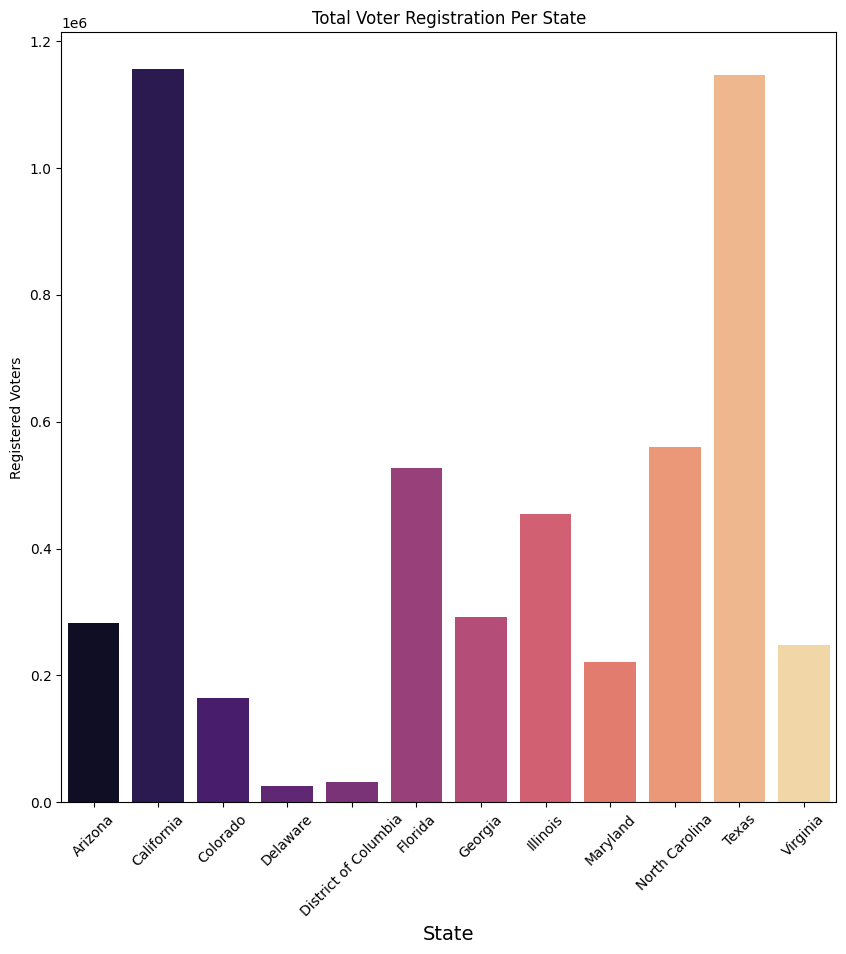

In [13]:
states_total_voters = voters.groupby('NAME')["registered_voters"].sum().reset_index()

plt.figure(figsize=(10, 10))
sns.barplot(data = states_total_voters, x = "NAME", y = "registered_voters", hue = "NAME", palette = "magma")
plt.xlabel("State", fontsize=14)
plt.ylabel("Registered Voters")
plt.title("Total Voter Registration Per State")
plt.xticks(rotation = 45)

plt.show()

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

In 2016, we can see a steady increase in voter registrations from Jan to March which then steadily decreases, a more reasonable trend compared to 2020. In 2020, we still see an increase in voter registrations from Jan but only to Feb where it there is a drastic decrease all the way to April. This sharp decline suggests there was a major external factor disrupting people from registering. The most likely cause being the COVID-19 pandemic which occured during that time restricting in-person registrations.

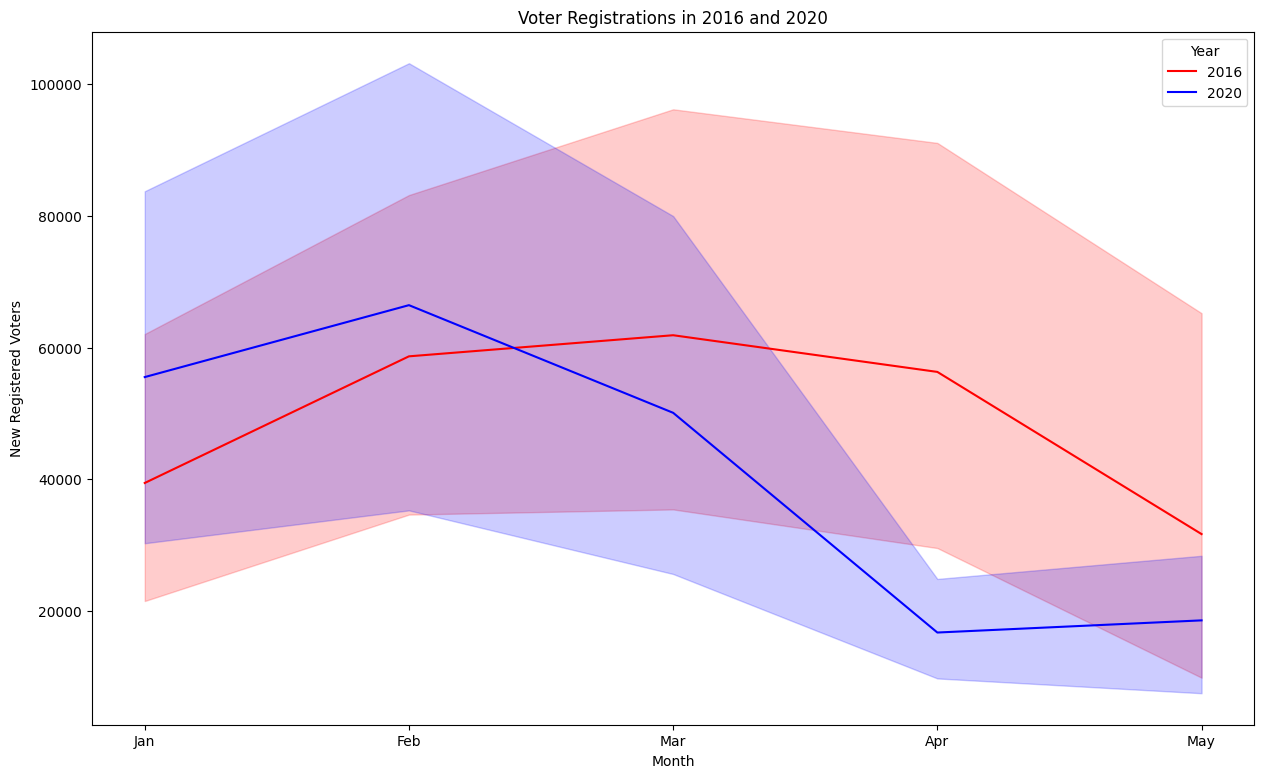

In [14]:
plt.figure(figsize=(15, 9))
sns.lineplot(voters, x = "Month", y = "registered_voters", hue = "Year", palette = ["red", "blue"])
#I tried putting month for hue argument however it does produce a graph that can be analyzed

plt.title("Voter Registrations in 2016 and 2020")
plt.xlabel("Month")
plt.ylabel("New Registered Voters")
plt.legend(title = "Year")
plt.show()

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

In 2020, Jan and Feb had more voter registrations compared to 2016,  
whereas in 2016 of April, there were more voter registrations compared to 2020.

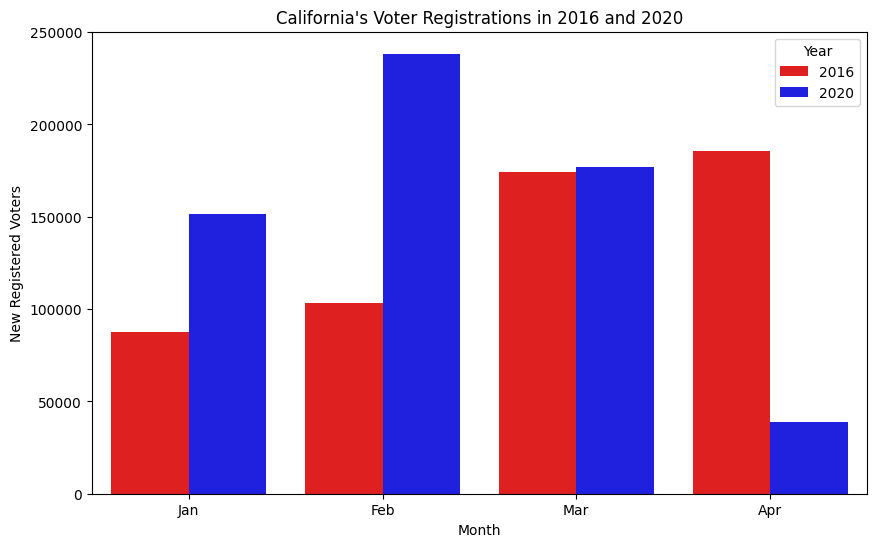

In [15]:
#although the code is very similar to the question above,
#the question above does not show state level and only shows national level
#therefore, I believe that my state-level question cannot be answered soley from the above graph
california_data = voters[voters["NAME"] == "California"]

plt.figure(figsize=(10, 6))
sns.barplot(california_data, x = "Month", y = "registered_voters", hue = "Year", palette = ["red", "blue"])

plt.title("California's Voter Registrations in 2016 and 2020")
plt.xlabel("Month")
plt.ylabel("New Registered Voters")
plt.legend(title = "Year")

##Mapping (14 points)

Load in our shape file data from the mapping unit.

In [16]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.02 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Set our continental US bounding box to us for the next questions. (2 points)

In [17]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

Create a dataframe that shows the average voter registration per state. (2 points)

In [18]:
avg_reg_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_reg_state.columns = ["State", "Average Voters"]
avg_reg_state = avg_reg_state.rename(columns={"State":"NAME"})

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [19]:
USS_Map = bbox.merge(avg_reg_state, on = "NAME", how = "inner")

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

Text(0.5, 1.0, 'Average State Voters')

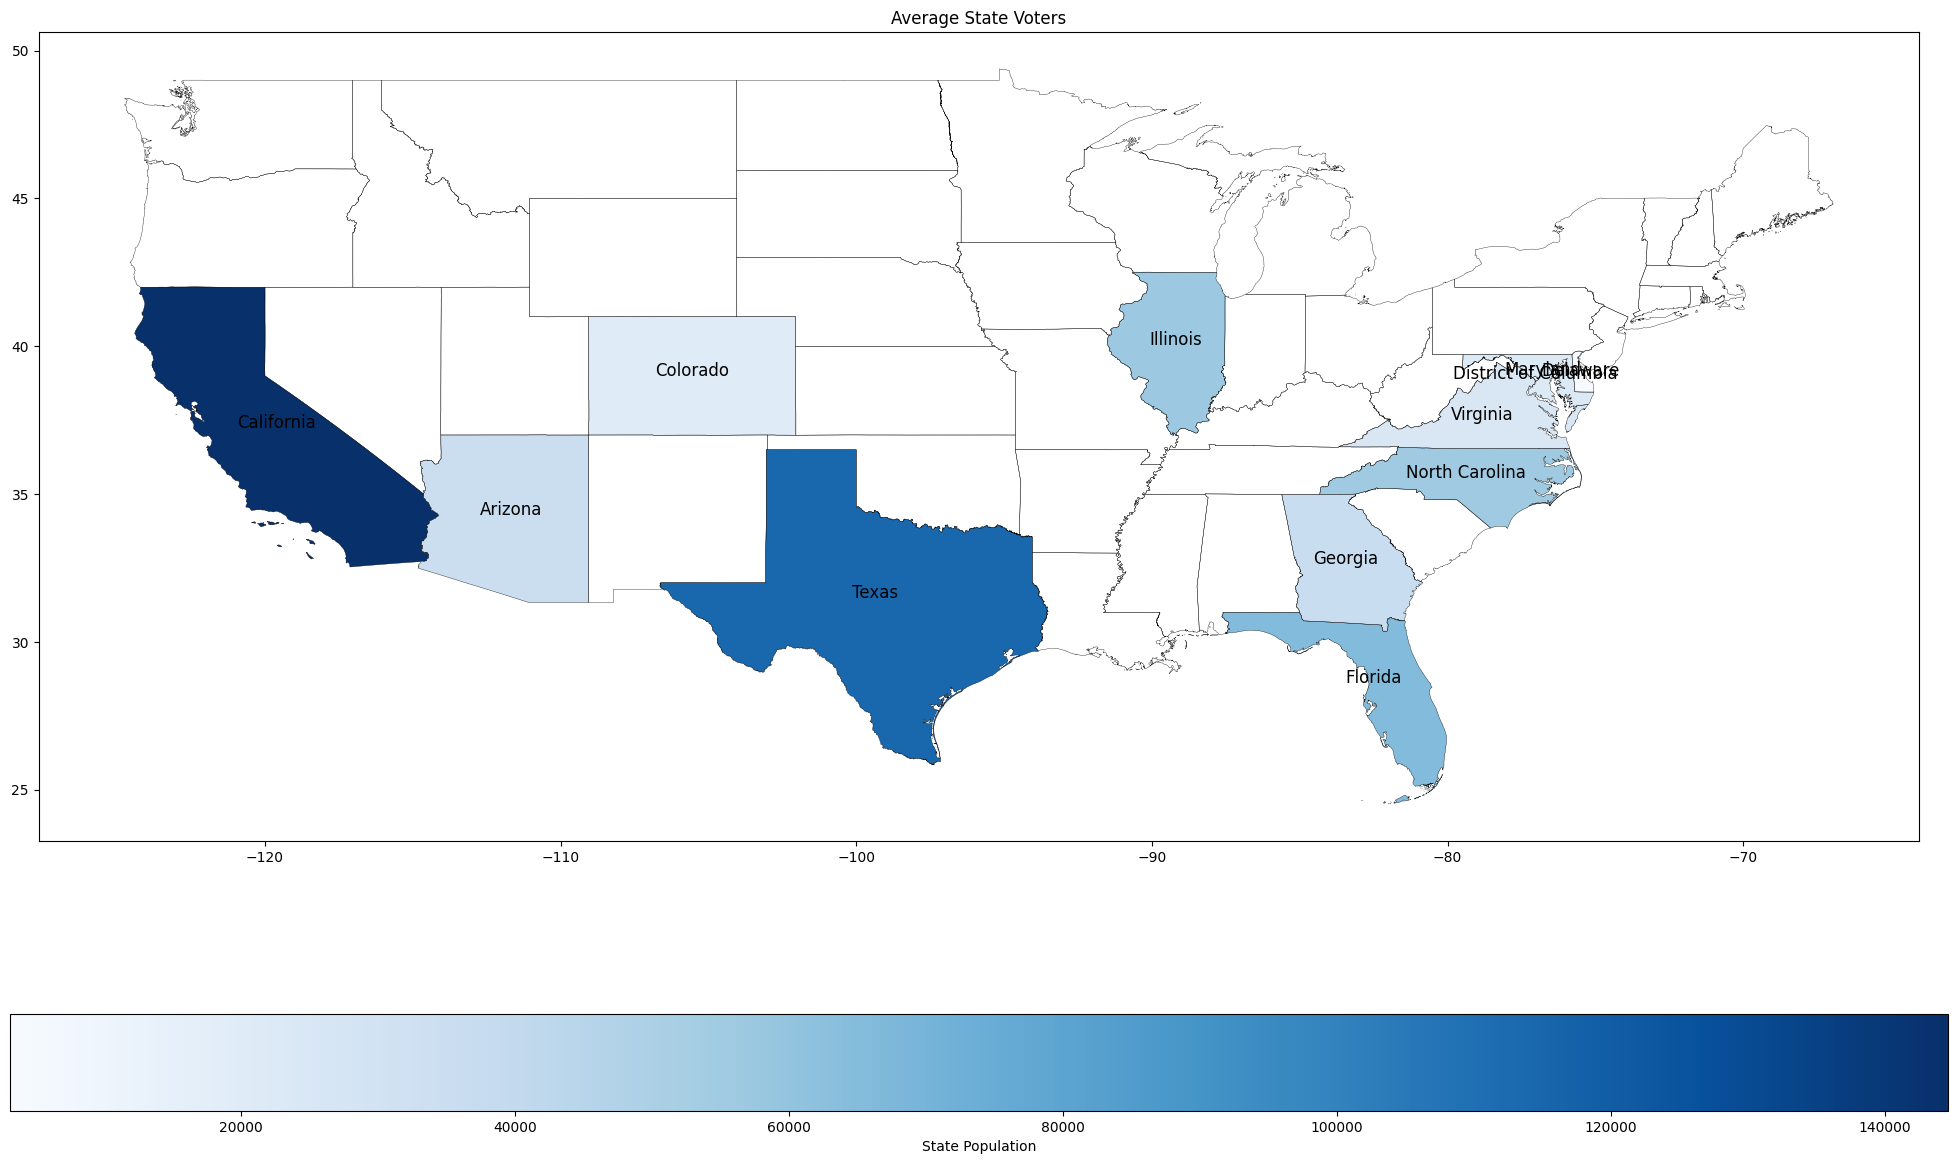

In [20]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot()

state_abbreviations = {"California": "CA", "Texas": "TX", "Florida": "FL", "New York": "NY",
                       "Pennsylvania": "PA", "Illinois": "IL", "Ohio": "OH", "Georgia": "GA",
                       "North Carolina": "NC", "Michigan": "MI", "Arizona": "AZ", "Colorado": "CO",
                       "Delaware": "DE", "District of Columbia": "DoC", "Maryland": "MD", "Virginia": "VA"}
                       #tried and gave up

USS_Map.plot(column = "Average Voters", ax=ax, legend = True,cmap = "Blues",
             legend_kwds={"label": "State Population",
            "orientation": "horizontal"})

USS_Map.apply(lambda x: ax.annotate(text=x.NAME,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=12),axis=1)

bbox.boundary.plot(ax=ax, color = "black", linewidth = 0.25)
plt.title("Average State Voters")



##Conclusion  (15 points)

**Insights:** The analysis of voter registration data in the US revealed how the global pandemic affected voter registrations. The conclusions made from the graph "California's Voter Registrations in 2016 and 2020" showed that the pandemic had a great affect on voter registration displaying a drastic decrease in the months of Feb through Mar. This decrease in registrations most likely was a result from various pandemic-related factors such as limited access outside. In addition, the map and data visualizations provide a clear depiction of how voter registration varies across the States, showing each states' engagement and political power.   
**Suggestions:** The first suggestion I have for my client is to account for possible hinders to in-person registrations such as the unforseen pandemic. While the pandemic was an unpredictable factor, increasing access to online registration can mitigate future scenarios decreasing the potential harm. Additionally by transitioning voter registrations online, it will be easier for new registrations to occur further increasing voter engagement.  
**Possible next steps:** A very clear next step would be to gather data covering every month in the year. This would provide a more complete picture of voter registrations without any gaps resulting in more accurate conclusions. We can go even further by include multiple elections across different presidencies into our data to view how voter registrations change over time. By increasing the amount of data, we could make more informed recommendations for increasing future voter engagement.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

In [20]:
https://github.com/jyu23333/325-Midterm.git

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

JiaXi(Jason) Yu